In [241]:
#Z_Alt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")

#Does Z_Alt strongly correlate with our Credit Score rating?
#Only used for public companies
data.replace(to_replace = 'Limited_liability_company', value = '0', inplace = True)
data = data[['Company_Name','NIF_Code', 'Legal_Form','Z_Alt','Z_Alt_Category','Credit_score','CS_Category_Type']]
data = data[~data['Legal_Form'].isin(['0'])]

def z_alt_num(row):
    if row["Z_Alt_Category"] == "Bankruptcy Imminent":
        return "4"
    elif row["Z_Alt_Category"] == "Bankruptcy Probable":
        return "3"
    elif row["Z_Alt_Category"] == "Bankruptcy Possible":
        return "2"
    elif row["Z_Alt_Category"] == "Bankruptcy Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Z_Alt_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "4"
    elif row["CS_Category_Type"] == "Fair":
        return "3"
    elif row["CS_Category_Type"] == "Good":
        return "2"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,4,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Z_Alt_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Z_Alt_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Z_Alt'].mean()
sd_z_alt=data['Z_Alt'].std()
print("z_alt mean=",mean_z_alt)#Bankruptcy improbable
print("z_alt sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Z_Alt.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Z_Alt_Number'])
print()
covariance = cov(data['Z_Alt'],data['Credit_score'])
print(covariance)
print()
data.to_csv("data.csv")

ValueError: Wrong number of items passed 7, placement implies 1

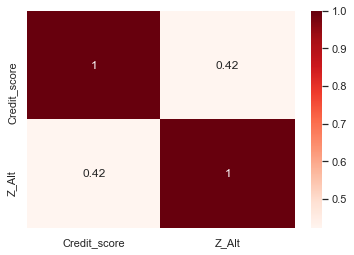

0    162
1    121
Name: difference, dtype: int64

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")

#Does Z_Alt strongly correlate with our Credit Score rating?
#Only used for public companies
data.replace(to_replace = 'Limited_liability_company', value = '0', inplace = True)
data = data[['Company_Name','NIF_Code', 'Legal_Form','Z_Alt','Z_Alt_Category','Credit_score','CS_Category_Type']]
data = data[~data['Legal_Form'].isin(['0'])]

def z_alt_num(row):
    if row["Z_Alt_Category"] == "Bankruptcy Improbable":
        return "1"
    elif row["Z_Alt_Category"] == "Bankruptcy Possible":
        return ".75"
    elif row["Z_Alt_Category"] == "Bankruptcy Probable":
        return ".5"
    elif row["Z_Alt_Category"] == "Bankruptcy Imminent":
        return ".25"
    else:
        return "0"
data = data.assign(Z_Alt_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Very Good":
        return "1"
    elif row["CS_Category_Type"] == "Excellent":
        return "1"
    elif row["CS_Category_Type"] == "Good":
        return ".75"
    elif row["CS_Category_Type"] == "Fair":
        return ".5"
    elif row["CS_Category_Type"] == "Poor":
        return ".25"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Z_Alt_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Z_Alt']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Z_Alt_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()

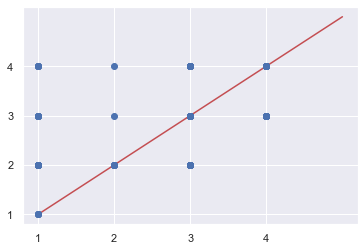

z1_alt mean= 77.76753609161707
z1_alt sd= 565.208492339893

credit score mean= 55.746872727272745
credit score sd= 11.759671638518922

count     275.000000
mean       77.767536
std       565.208492
min        -1.163574
25%         1.077945
50%         1.600409
75%         2.294538
max      4591.967398
Name: Z1_Alt, dtype: float64

count    275.000000
mean      55.746873
std       11.759672
min       27.190000
25%       47.895000
50%       55.350000
75%       64.505000
max       83.310000
Name: Credit_score, dtype: float64

[[3.19460640e+05 6.32689015e+02]
 [6.32689015e+02 1.38289877e+02]]



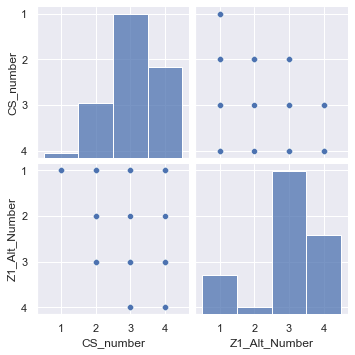

In [223]:
#Zalt 1
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")

#Does Z_Alt strongly correlate with our Credit Score rating?
#Only used for public companies
data.replace(to_replace = 'Public_limited_company', value = '0', inplace = True)
data = data[['Company_Name','NIF_Code', 'Legal_Form','Z1_Alt','Z1_Alt_Category','Credit_score','CS_Category_Type']]
data = data[~data['Legal_Form'].isin(['0'])]
#data.to_csv("data.csv")

def z_alt_num(row):
    if row["Z1_Alt_Category"] == "Bankruptcy Imminent":
        return "4"
    elif row["Z1_Alt_Category"] == "Bankruptcy Probable":
        return "3"
    elif row["Z1_Alt_Category"] == "Bankruptcy Possible":
        return "2"
    elif row["Z1_Alt_Category"] == "Bankruptcy Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Z1_Alt_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "4"
    elif row["CS_Category_Type"] == "Fair":
        return "3"
    elif row["CS_Category_Type"] == "Good":
        return "2"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"
data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,4,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Z1_Alt_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Z1_Alt_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Z1_Alt'].mean()
sd_z_alt=data['Z1_Alt'].std()
print("z1_alt mean=",mean_z_alt)#Bankruptcy improbable
print("z1_alt sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Z1_Alt.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Z1_Alt_Number'])
print()
covariance = cov(data['Z1_Alt'],data['Credit_score'])
print(covariance)
print()



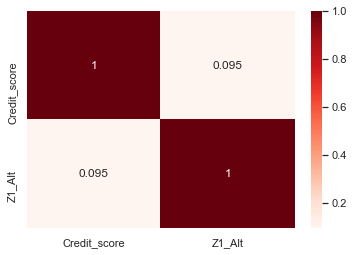

1    162
0    113
Name: difference, dtype: int64

In [178]:
#Zalt 1
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")

#Does Z_Alt strongly correlate with our Credit Score rating?
#Only used for public companies
data.replace(to_replace = 'Public_limited_company', value = '0', inplace = True)
data = data[['Company_Name','NIF_Code', 'Legal_Form','Z1_Alt','Z1_Alt_Category','Credit_score','CS_Category_Type']]
data = data[~data['Legal_Form'].isin(['0'])]

def z_alt_num(row):
    if row["Z1_Alt_Category"] == "Bankruptcy Improbable":
        return "1"
    elif row["Z1_Alt_Category"] == "Bankruptcy Possible":
        return ".75"
    elif row["Z1_Alt_Category"] == "Bankruptcy Probable":
        return ".5"
    elif row["Z1_Alt_Category"] == "Bankruptcy Imminent":
        return ".25"
    else:
        return "0"
data = data.assign(Z1_Alt_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Very Good":
        return "1"
    elif row["CS_Category_Type"] == "Excellent":
        return "1"
    elif row["CS_Category_Type"] == "Good":
        return ".75"
    elif row["CS_Category_Type"] == "Fair":
        return ".5"
    elif row["CS_Category_Type"] == "Poor":
        return ".25"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Z1_Alt_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Z1_Alt']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Z1_Alt_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()

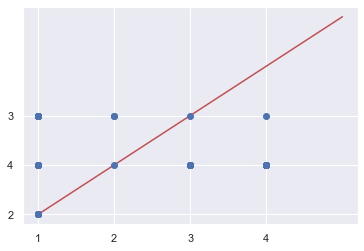

z2_alt mean= 1024.0442188830827
z2_alt sd= 3174.7205770716328

credit score mean= 46.83392156862744
credit score sd= 12.2832806820379

count       51.000000
mean      1024.044219
std       3174.720577
min         -9.534679
25%          0.372758
50%          2.200928
75%          4.475019
max      11479.333574
Name: Z2_Alt, dtype: float64

count    51.000000
mean     46.833922
std      12.283281
min      27.030000
25%      35.980000
50%      45.960000
75%      54.870000
max      71.800000
Name: Credit_score, dtype: float64

[[1.00788507e+07 1.78735739e+04]
 [1.78735739e+04 1.50878984e+02]]



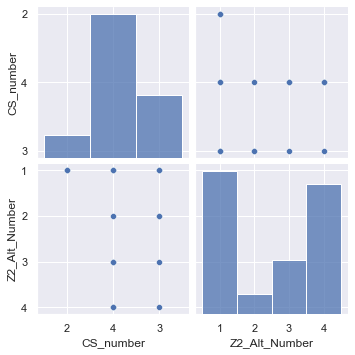

In [231]:
#z2_alt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")


def z2_alt_num(row):
    if row["Company_Age_(years)"] < 15:
        return "1"
    else:
        return "0"
def z3_alt_num(row):
    if row["Number_of_Employees"] < 20:
        return "1"
    else:
        return "0"
data = data.assign(Z2_Alt_Number1=data.apply(z2_alt_num, axis=1))
data = data.assign(Z3_Alt_Number=data.apply(z3_alt_num, axis=1))

data = data[~data['Z2_Alt_Number1'].isin(['0'])]
data = data[~data['Z3_Alt_Number'].isin(['0'])]

data = data[['Company_Name','NIF_Code', 'Legal_Form','Z2_Alt','Z2_Alt_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Z2_Alt_Category"] == "Bankruptcy Imminent":
        return "4"
    elif row["Z2_Alt_Category"] == "Bankruptcy Probable":
        return "3"
    elif row["Z2_Alt_Category"] == "Bankruptcy Possible":
        return "2"
    elif row["Z2_Alt_Category"] == "Bankruptcy Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Z2_Alt_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "4"
    elif row["CS_Category_Type"] == "Fair":
        return "3"
    elif row["CS_Category_Type"] == "Good":
        return "2"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,4,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Z2_Alt_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Z2_Alt_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Z2_Alt'].mean()
sd_z_alt=data['Z2_Alt'].std()
print("z2_alt mean=",mean_z_alt)#Bankruptcy improbable
print("z2_alt sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Z2_Alt.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Z2_Alt_Number'])
print()
covariance = cov(data['Z2_Alt'],data['Credit_score'])
print(covariance)
print()
data.to_csv("data.csv")

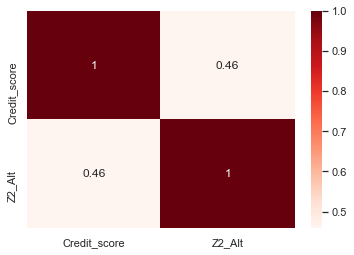

0    32
1    19
Name: difference, dtype: int64

In [197]:
#z2_alt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")


def z2_alt_num(row):
    if row["Company_Age_(years)"] < 15:
        return "1"
    else:
        return "0"
def z3_alt_num(row):
    if row["Number_of_Employees"] < 20:
        return "1"
    else:
        return "0"
data = data.assign(Z2_Alt_Number1=data.apply(z2_alt_num, axis=1))
data = data.assign(Z3_Alt_Number=data.apply(z3_alt_num, axis=1))

data = data[~data['Z2_Alt_Number1'].isin(['0'])]
data = data[~data['Z3_Alt_Number'].isin(['0'])]

data = data[['Company_Name','NIF_Code', 'Legal_Form','Z2_Alt','Z2_Alt_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Z2_Alt_Category"] == "Bankruptcy Imminent":
        return "4"
    elif row["Z2_Alt_Category"] == "Bankruptcy Probable":
        return "3"
    elif row["Z2_Alt_Category"] == "Bankruptcy Possible":
        return "2"
    elif row["Z2_Alt_Category"] == "Bankruptcy Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Z2_Alt_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "4"
    elif row["CS_Category_Type"] == "Fair":
        return "3"
    elif row["CS_Category_Type"] == "Good":
        return "2"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Z2_Alt_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Z2_Alt']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Z2_Alt_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()
#data.to_csv("data.csv")

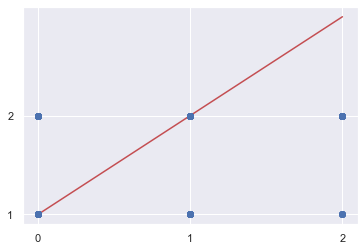

Ful mean= 4.446496130190004
Ful sd= 54.841567635382106

credit score mean= 59.13351254480288
credit score sd= 13.17155336930783

count     558.000000
mean        4.446496
std        54.841568
min       -27.194531
25%         0.000000
50%         1.497408
75%         3.501682
max      1294.276629
Name: Ful, dtype: float64

count    558.000000
mean      59.133513
std       13.171553
min       23.440000
25%       50.122500
50%       60.850000
75%       68.455000
max       88.900000
Name: Credit_score, dtype: float64

[[3007.59754071   -8.79463428]
 [  -8.79463428  173.48981816]]



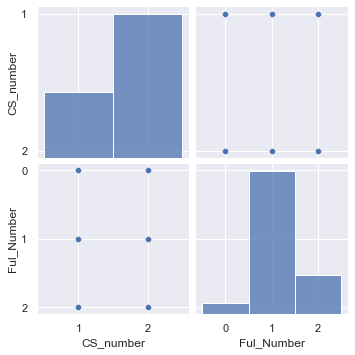

In [232]:
#fulmer
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Ful','Ful_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Ful_Category"] == "Insolvent":
        return "2"
    elif row["Ful_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Ful_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,2,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Ful_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Ful_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Ful'].mean()
sd_z_alt=data['Ful'].std()
print("Ful mean=",mean_z_alt)#Bankruptcy improbable
print("Ful sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Ful.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Ful_Number'])
print()
covariance = cov(data['Ful'],data['Credit_score'])
print(covariance)
print()
data.to_csv("data.csv")

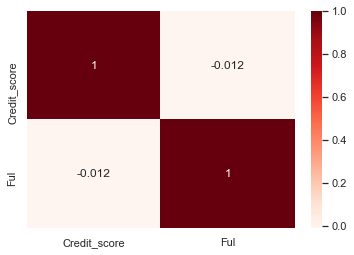

0    300
1    258
Name: difference, dtype: int64

In [213]:
#ful
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Ful','Ful_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Ful_Category"] == "Insolvent":
        return "2"
    elif row["Ful_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Ful_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Ful_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Ful']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Ful_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()

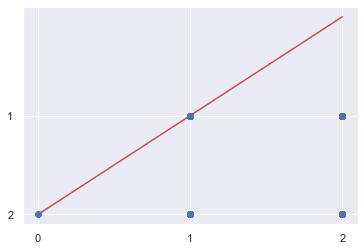

Spr mean= 7.031851855976018
Spr sd= 72.70450496580304

credit score mean= 59.13351254480292
credit score sd= 13.171553369307833

count     558.000000
mean        7.031852
std        72.704505
min      -323.915988
25%         0.450070
50%         0.808724
75%         1.244083
max      1186.774751
Name: Spr, dtype: float64

count    558.000000
mean      59.133513
std       13.171553
min       23.440000
25%       50.122500
50%       60.850000
75%       68.455000
max       88.900000
Name: Credit_score, dtype: float64

[[5285.94504232   50.34474136]
 [  50.34474136  173.48981816]]



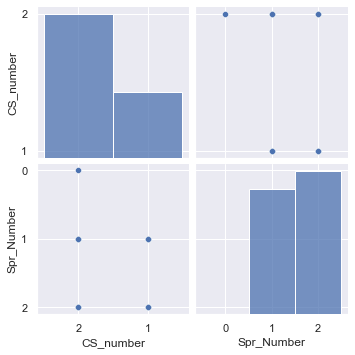

In [234]:
#spr
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Spr','Spr_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Spr_Category"] == "Insolvent":
        return "2"
    elif row["Spr_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Spr_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,2,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Spr_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Spr_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Spr'].mean()
sd_z_alt=data['Spr'].std()
print("Spr mean=",mean_z_alt)#Bankruptcy improbable
print("Spr sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Spr.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Spr_Number'])
print()
covariance = cov(data['Spr'],data['Credit_score'])
print(covariance)
print()
data.to_csv("data.csv")

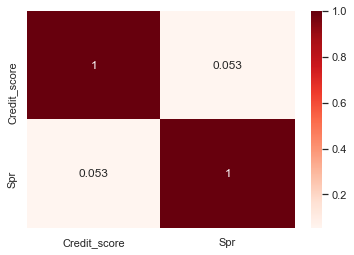

1    413
0    145
Name: difference, dtype: int64

In [238]:
#spr
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Spr','Spr_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Spr_Category"] == "Insolvent":
        return "2"
    elif row["Spr_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Spr_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Spr_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Spr']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Spr_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()


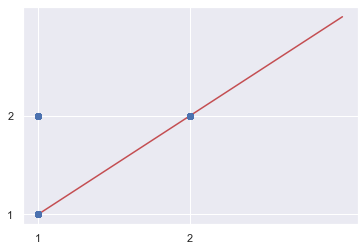

Ca mean= 2.224522860985993
Ca sd= 3.6740729078955217

credit score mean= 59.13351254480293
credit score sd= 13.17155336930783

count    558.000000
mean       2.224523
std        3.674073
min      -22.946888
25%        1.143073
50%        2.261077
75%        3.265095
max       48.138010
Name: Ca, dtype: float64

count    558.000000
mean      59.133513
std       13.171553
min       23.440000
25%       50.122500
50%       60.850000
75%       68.455000
max       88.900000
Name: Credit_score, dtype: float64

[[ 13.49881173  22.26715222]
 [ 22.26715222 173.48981816]]



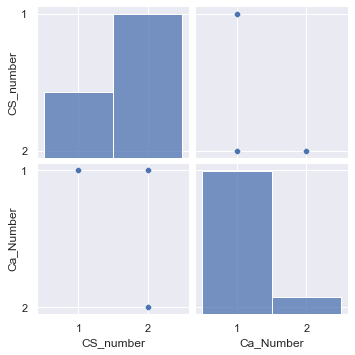

In [236]:
#Ca
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Ca','Ca_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Ca_Category"] == "Insolvent":
        return "2"
    elif row["Ca_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Ca_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,2,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Ca_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Ca_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Ca'].mean()
sd_z_alt=data['Ca'].std()
print("Ca mean=",mean_z_alt)#Bankruptcy improbable
print("Ca sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Ca.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Ca_Number'])
print()
covariance = cov(data['Ca'],data['Credit_score'])
print(covariance)
print()
data.to_csv("data.csv")

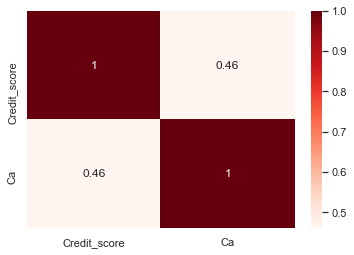

0    321
1    237
Name: difference, dtype: int64

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Ca','Ca_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Ca_Category"] == "Insolvent":
        return "2"
    elif row["Ca_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Ca_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Ca_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Ca']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Ca_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()



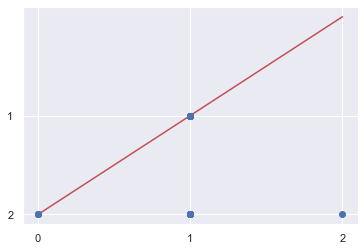

Kan mean= 164.23113075005404
Kan sd= 1614.1966220538177

credit score mean= 59.13351254480295
credit score sd= 13.171553369307833

count      558.000000
mean       164.231131
std       1614.196622
min         -5.364671
25%          4.069645
50%          6.571646
75%         13.150957
max      18866.792578
Name: Kan, dtype: float64

count    558.000000
mean      59.133513
std       13.171553
min       23.440000
25%       50.122500
50%       60.850000
75%       68.455000
max       88.900000
Name: Credit_score, dtype: float64

[[2.60563073e+06 8.26753428e+02]
 [8.26753428e+02 1.73489818e+02]]



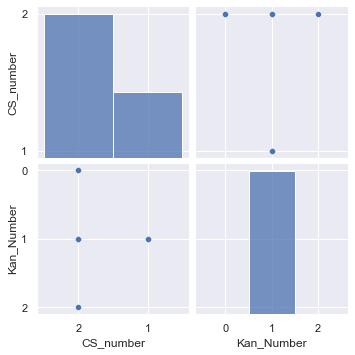

In [237]:
#Kan
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Kan','Kan_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Kan_Category"] == "Insolvent":
        return "2"
    elif row["Kan_Category"] == "Undefined":
        return "0"
    elif row["Kan_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Kan_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
x = np.linspace(0,2,100)
y = x
plt.plot(x, y, '-r', label='y=x')
data = data.sort_values('CS_number', ascending = True).reset_index(drop=True)
data = data.sort_values('Kan_Number', ascending = True).reset_index(drop=True)
plt.plot(data['Kan_Number'],data['CS_number'],'o')
plt.show()
#data.head(10)

#sns.set()
#cs_num = data.CS_number.to_numpy()
#z_alt_num = data.Z_Alt_Number.to_numpy()
#plt.scatter(cs_num, z_alt_num)
#plt.show()


mean_z_alt=data['Kan'].mean()
sd_z_alt=data['Kan'].std()
print("Kan mean=",mean_z_alt)#Bankruptcy improbable
print("Kan sd=",sd_z_alt)
print()
mean_credit_score=data['Credit_score'].mean()
sd_credit_score=data['Credit_score'].std()
print("credit score mean=", mean_credit_score)#Fair
print("credit score sd=",sd_credit_score)#sd of credit score
print()
zdes=data.Kan.describe()
print(zdes)
print()
csdes=data.Credit_score.describe()
print(csdes)

#data.plot.scatter(x="CS_number",y="Z_Alt_Number")
#plt.show()
sns.pairplot(data = data, vars=['CS_number','Kan_Number'])
print()
covariance = cov(data['Kan'],data['Credit_score'])
print(covariance)
print()
data.to_csv("data.csv")

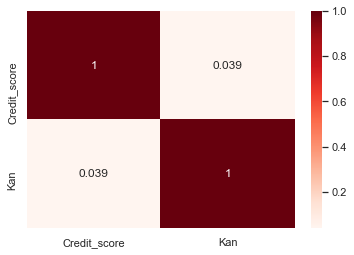

0    381
1    177
Name: difference, dtype: int64

In [218]:
#Kan
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
data = pd.read_csv("Final3.csv")
data = data[['Company_Name','NIF_Code', 'Legal_Form','Kan','Kan_Category','Credit_score','CS_Category_Type']]


def z_alt_num(row):
    if row["Kan_Category"] == "Insolvent":
        return "2"
    elif row["Kan_Category"] == "Undefined":
        return "0"
    elif row["Kan_Category"] == "Improbable":
        return "1"
    else:
        return "0"
data = data.assign(Kan_Number=data.apply(z_alt_num, axis=1))
    
def cs_num(row):
    if row["CS_Category_Type"] == "Poor":
        return "2"
    elif row["CS_Category_Type"] == "Fair":
        return "2"
    elif row["CS_Category_Type"] == "Good":
        return "1"
    elif row["CS_Category_Type"] == "Very Good":
        return "1"
    else:
        return "0"

data = data.assign(CS_number=data.apply(cs_num, axis=1))
data[['Kan_Number','CS_number']].corr()
sns.heatmap(data[['Credit_score','Kan']].corr(), annot=True, cmap = 'Reds')
plt.show()

def diff(row):
    if row['Kan_Number']==row['CS_number']:
        return "1"
    else:
        return "0"
    
data = data.assign(difference=data.apply(diff, axis=1))
data.head()
data['difference'].value_counts()

